In [1]:
import pandas as pd
import matplotlib.pyplot as plt
Z = 1.96


In [2]:
path = "../../../Risultati/NEWeather/knn_classification.csv"
df = pd.read_csv(path)
df.reset_index(drop=True)
df['percentage'] = 100 - df['percentage']
df

,percentage,outlier,imputation,r2
0,100,none,none,0.760490
1,90,none,none,0.754365
2,90,z,drop,1.000000
3,90,z,LOCF,0.707138
4,90,z,mean,0.971263
...,...,...,...,...
671,50,iforest,interpolation,0.702616
672,50,hst,drop,0.810813
673,50,hst,LOCF,0.708398
674,50,hst,mean,0.727174


In [3]:
df_neg = df[df['r2']<0]
df_neg

,percentage,outlier,imputation,r2


In [4]:
df.loc[df['r2'] < 0, 'r2'] = 0

In [5]:
df

,percentage,outlier,imputation,r2
0,100,none,none,0.760490
1,90,none,none,0.754365
2,90,z,drop,1.000000
3,90,z,LOCF,0.707138
4,90,z,mean,0.971263
...,...,...,...,...
671,50,iforest,interpolation,0.702616
672,50,hst,drop,0.810813
673,50,hst,LOCF,0.708398
674,50,hst,mean,0.727174


In [6]:
df_grouped = df.groupby(['outlier','imputation']).mean().sort_values(by='r2', ascending=False)
print(df_grouped)

                       percentage        r2
outlier imputation                         
z       drop            70.000000  1.000000
        mean            70.000000  0.951179
iforest drop            70.000000  0.798903
hst     drop            70.000000  0.783790
lof     drop            70.000000  0.758255
hst     mean            70.000000  0.740655
        interpolation   70.000000  0.733788
none    none            70.833333  0.733049
hst     LOCF            70.000000  0.732479
lof     interpolation   70.000000  0.731107
        LOCF            70.000000  0.726141
        mean            70.000000  0.721445
iforest interpolation   70.000000  0.706341
z       interpolation   70.000000  0.705480
iforest LOCF            70.000000  0.705275
z       LOCF            70.000000  0.692213
iforest mean            70.000000  0.689368


In [7]:
top_performance = df[df['percentage']==100]['r2'].mean()
top_performance

0.7604900108764097

In [8]:
df['percent_diff'] = (((df['r2'] - top_performance) / top_performance) * 100).round(2)
df

,percentage,outlier,imputation,r2,percent_diff
0,100,none,none,0.760490,0.00
1,90,none,none,0.754365,-0.81
2,90,z,drop,1.000000,31.49
3,90,z,LOCF,0.707138,-7.02
4,90,z,mean,0.971263,27.72
...,...,...,...,...,...
671,50,iforest,interpolation,0.702616,-7.61
672,50,hst,drop,0.810813,6.62
673,50,hst,LOCF,0.708398,-6.85
674,50,hst,mean,0.727174,-4.38


In [9]:
tabella = df.groupby(['outlier','imputation','percentage']).mean()
tabella['r2'] = tabella['r2'].round(4)
tabella['percent_diff'] = tabella['percent_diff'].round(2)
tabella.sort_values(by=['outlier','imputation'],ascending=False).to_csv("4_c.csv")
tabella = tabella.reset_index()
tabella = tabella.pivot(index=['outlier','imputation'],columns='percentage',values='percent_diff').reset_index().sort_values(by=[100,90,80,70],ascending=False)
tabella.to_csv("4_c_n.csv")

In [10]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))

In [11]:
df_z_drop = df[(df['outlier'] == 'z') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_drop['CI_Min'] = df_z_drop['mean'] - Z * (df_z_drop['std'] / (4 ** 0.5))
df_z_drop['CI_Max'] = df_z_drop['mean'] + Z * (df_z_drop['std'] / (4 ** 0.5))

In [12]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_locf['CI_Min'] = df_z_locf['mean'] - Z * (df_z_locf['std'] / (4 ** 0.5))
df_z_locf['CI_Max'] = df_z_locf['mean'] + Z * (df_z_locf['std'] / (4 ** 0.5))

In [13]:
df_z_mean = df[(df['outlier'] == 'z') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_mean['CI_Min'] = df_z_mean['mean'] - Z * (df_z_mean['std'] / (4 ** 0.5))
df_z_mean['CI_Max'] = df_z_mean['mean'] + Z * (df_z_mean['std'] / (4 ** 0.5))

In [14]:
df_z_int = df[(df['outlier'] == 'z') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_z_int['CI_Min'] = df_z_int['mean'] - Z * (df_z_int['std'] / (4 ** 0.5))
df_z_int['CI_Max'] = df_z_int['mean'] + Z * (df_z_int['std'] / (4 ** 0.5))

In [15]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_drop['CI_Min'] = df_lof_drop['mean'] - Z * (df_lof_drop['std'] / (4 ** 0.5))
df_lof_drop['CI_Max'] = df_lof_drop['mean'] + Z * (df_lof_drop['std'] / (4 ** 0.5))

In [16]:
df_lof_locf = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_locf['CI_Min'] = df_lof_locf['mean'] - Z * (df_lof_locf['std'] / (4 ** 0.5))
df_lof_locf['CI_Max'] = df_lof_locf['mean'] + Z * (df_lof_locf['std'] / (4 ** 0.5))

In [17]:
df_lof_mean = df[(df['outlier'] == 'lof') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_mean['CI_Min'] = df_lof_mean['mean'] - Z * (df_lof_mean['std'] / (4 ** 0.5))
df_lof_mean['CI_Max'] = df_lof_mean['mean'] + Z * (df_lof_mean['std'] / (4 ** 0.5))

In [18]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_lof_int['CI_Min'] = df_lof_int['mean'] - Z * (df_lof_int['std'] / (4 ** 0.5))
df_lof_int['CI_Max'] = df_lof_int['mean'] + Z * (df_lof_int['std'] / (4 ** 0.5))

In [19]:
df_if_drop = df[(df['outlier'] == 'iforest') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_if_drop['CI_Min'] = df_if_drop['mean'] - Z * (df_if_drop['std'] / (4 ** 0.5))
df_if_drop['CI_Max'] = df_if_drop['mean'] + Z * (df_if_drop['std'] / (4 ** 0.5))

In [20]:
df_if_locf = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'LOCF')].groupby(['percentage'])['r2'].agg(
    ['mean', 'std']).reset_index()
df_if_locf['CI_Min'] = df_if_locf['mean'] - Z * (df_if_locf['std'] / (4 ** 0.5))
df_if_locf['CI_Max'] = df_if_locf['mean'] + Z * (df_if_locf['std'] / (4 ** 0.5))

In [21]:
df_if_mean = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'mean')].groupby(['percentage'])['r2'].agg(
    ['mean', 'std']).reset_index()
df_if_mean['CI_Min'] = df_if_mean['mean'] - Z * (df_if_mean['std'] / (4 ** 0.5))
df_if_mean['CI_Max'] = df_if_mean['mean'] + Z * (df_if_mean['std'] / (4 ** 0.5))

In [22]:
df_if_int = df[(df['outlier'] == 'iforest') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_if_int['CI_Min'] = df_if_int['mean'] - Z * (df_if_int['std'] / (4 ** 0.5))
df_if_int['CI_Max'] = df_if_int['mean'] + Z * (df_if_int['std'] / (4 ** 0.5))

In [23]:
df_hst_drop = df[(df['outlier'] == 'hst') & (df['imputation']=='drop')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_drop['CI_Min'] = df_hst_drop['mean'] - Z * (df_hst_drop['std'] / (4 ** 0.5))
df_hst_drop['CI_Max'] = df_hst_drop['mean'] + Z * (df_hst_drop['std'] / (4 ** 0.5))

In [24]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_locf['CI_Min'] = df_hst_locf['mean'] - Z * (df_hst_locf['std'] / (4 ** 0.5))
df_hst_locf['CI_Max'] = df_hst_locf['mean'] + Z * (df_hst_locf['std'] / (4 ** 0.5))

In [25]:
df_hst_mean = df[(df['outlier'] == 'hst') & (df['imputation']=='mean')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_mean['CI_Min'] = df_hst_mean['mean'] - Z * (df_hst_mean['std'] / (4 ** 0.5))
df_hst_mean['CI_Max'] = df_hst_mean['mean'] + Z * (df_hst_mean['std'] / (4 ** 0.5))

In [26]:
df_hst_int= df[(df['outlier'] == 'hst') & (df['imputation']=='interpolation')].groupby(['percentage'])['r2'].agg(['mean','std']).reset_index()
df_hst_int['CI_Min'] = df_hst_int['mean'] - Z * (df_hst_int['std'] / (4 ** 0.5))
df_hst_int['CI_Max'] = df_hst_int['mean'] + Z * (df_hst_int['std'] / (4 ** 0.5))

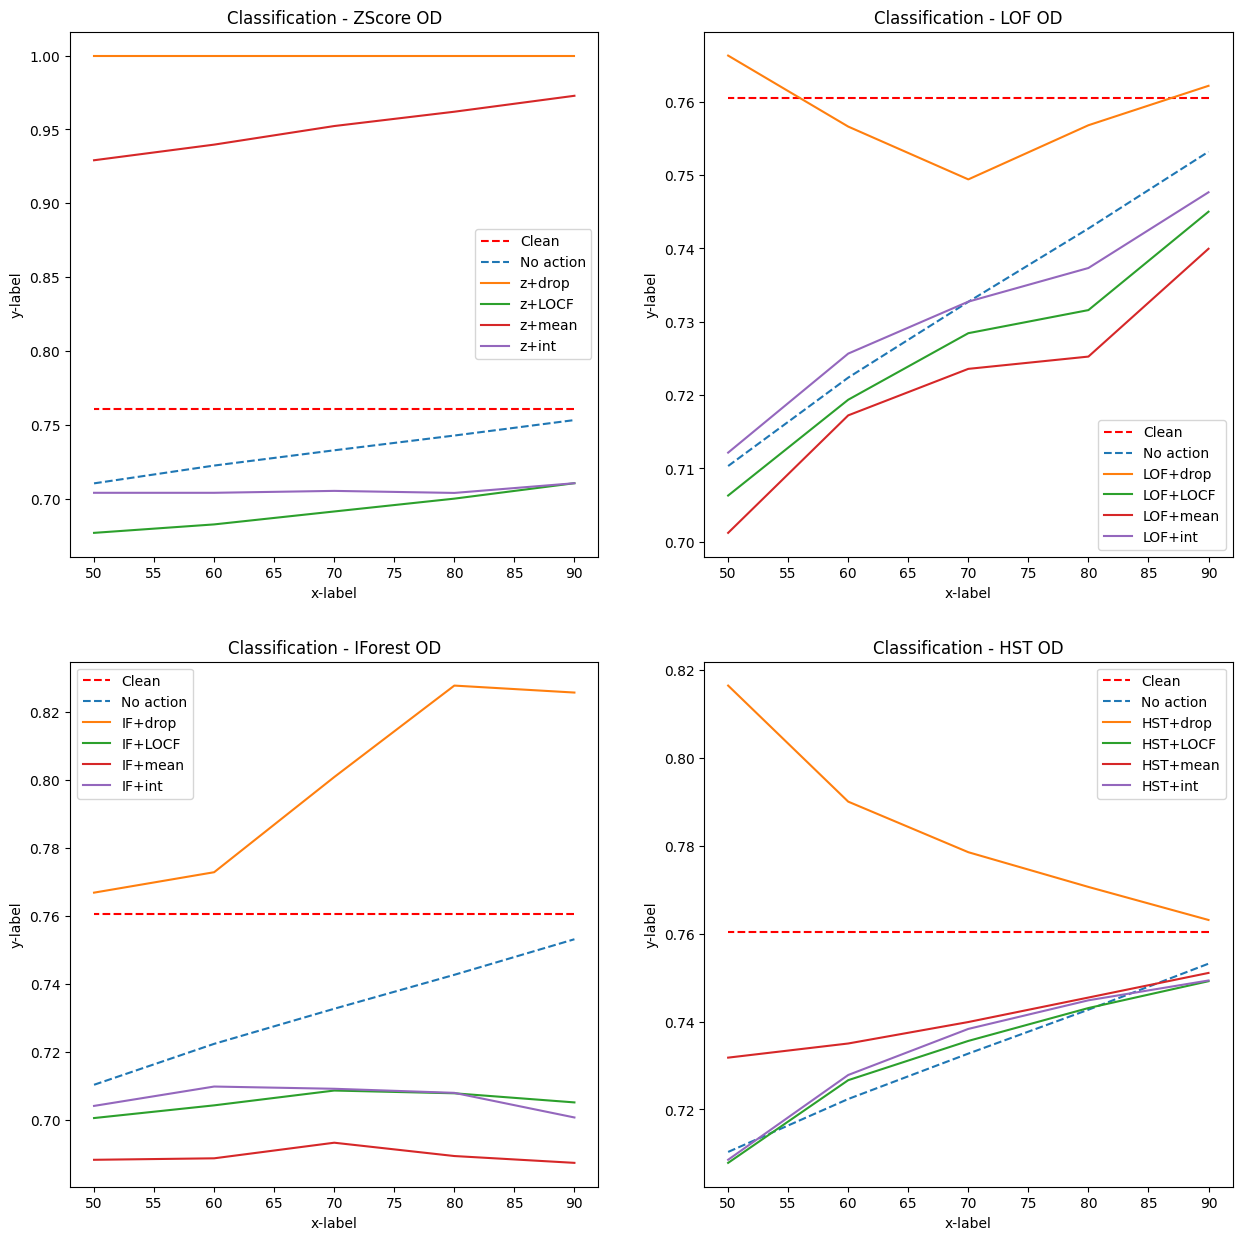

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
perc = [90,80,70,60,50]
axs[0,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,0].plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
axs[0,0].plot(df_z_locf['percentage'],df_z_locf['mean'], label='z+LOCF')
axs[0,0].plot(df_z_mean['percentage'],df_z_mean['mean'], label='z+mean')
axs[0,0].plot(df_z_int['percentage'],df_z_int['mean'], label='z+int')
axs[0,0].set_title("Classification - ZScore OD")
axs[0,0].legend()

axs[0,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,1].plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
axs[0,1].plot(df_lof_locf['percentage'],df_lof_locf['mean'], label='LOF+LOCF')
axs[0,1].plot(df_lof_mean['percentage'],df_lof_mean['mean'], label='LOF+mean')
axs[0,1].plot(df_lof_int['percentage'],df_lof_int['mean'], label='LOF+int')
axs[0,1].set_title("Classification - LOF OD")
axs[0,1].legend()

axs[1,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,0].plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
axs[1,0].plot(df_if_locf['percentage'],df_if_locf['mean'], label='IF+LOCF')
axs[1,0].plot(df_if_mean['percentage'],df_if_mean['mean'], label='IF+mean')
axs[1,0].plot(df_if_int['percentage'],df_if_int['mean'], label='IF+int')
axs[1,0].set_title("Classification - IForest OD")
axs[1,0].legend()

axs[1,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,1].plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
axs[1,1].plot(df_hst_locf['percentage'],df_hst_locf['mean'], label='HST+LOCF')
axs[1,1].plot(df_hst_mean['percentage'],df_hst_mean['mean'], label='HST+mean')
axs[1,1].plot(df_hst_int['percentage'],df_hst_int['mean'], label='HST+int')
axs[1,1].set_title("Classification - HST OD")
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')


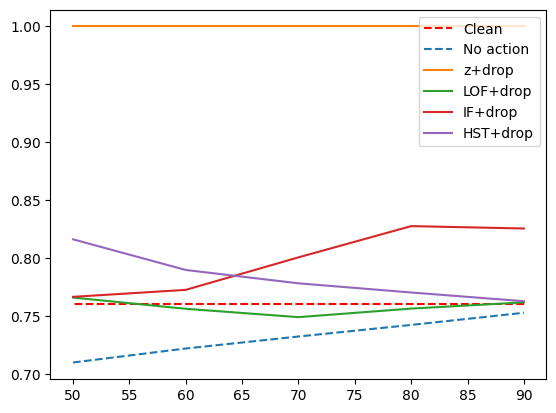

In [28]:
perc = [90,80,70,60,50]
plt.plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
plt.plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
plt.plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
plt.plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
plt.plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
plt.plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
plt.legend()

PERCENTAGE DIFFERENCE

In [29]:
df_none = df[(df['outlier'] == 'none') & (df['imputation']=='none')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_none['CI_Min'] = df_none['mean'] - Z * (df_none['std'] / (4 ** 0.5))
df_none['CI_Max'] = df_none['mean'] + Z * (df_none['std'] / (4 ** 0.5))

In [30]:
df_z_drop = df[(df['outlier'] == 'z') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_drop['CI_Min'] = df_z_drop['mean'] - Z * (df_z_drop['std'] / (4 ** 0.5))
df_z_drop['CI_Max'] = df_z_drop['mean'] + Z * (df_z_drop['std'] / (4 ** 0.5))

In [31]:
df_z_locf = df[(df['outlier'] == 'z') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_locf['CI_Min'] = df_z_locf['mean'] - Z * (df_z_locf['std'] / (4 ** 0.5))
df_z_locf['CI_Max'] = df_z_locf['mean'] + Z * (df_z_locf['std'] / (4 ** 0.5))

In [32]:
df_z_mean = df[(df['outlier'] == 'z') & (df['imputation']=='mean')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_mean['CI_Min'] = df_z_mean['mean'] - Z * (df_z_mean['std'] / (4 ** 0.5))
df_z_mean['CI_Max'] = df_z_mean['mean'] + Z * (df_z_mean['std'] / (4 ** 0.5))

In [33]:
df_z_int = df[(df['outlier'] == 'z') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_z_int['CI_Min'] = df_z_int['mean'] - Z * (df_z_int['std'] / (4 ** 0.5))
df_z_int['CI_Max'] = df_z_int['mean'] + Z * (df_z_int['std'] / (4 ** 0.5))

In [34]:
df_lof_drop = df[(df['outlier'] == 'lof') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_drop['CI_Min'] = df_lof_drop['mean'] - Z * (df_lof_drop['std'] / (4 ** 0.5))
df_lof_drop['CI_Max'] = df_lof_drop['mean'] + Z * (df_lof_drop['std'] / (4 ** 0.5))

In [35]:
df_lof_locf = df[(df['outlier'] == 'lof') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_locf['CI_Min'] = df_lof_locf['mean'] - Z * (df_lof_locf['std'] / (4 ** 0.5))
df_lof_locf['CI_Max'] = df_lof_locf['mean'] + Z * (df_lof_locf['std'] / (4 ** 0.5))

In [36]:
df_lof_mean = df[(df['outlier'] == 'lof') & (df['imputation']=='mean')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_mean['CI_Min'] = df_lof_mean['mean'] - Z * (df_lof_mean['std'] / (4 ** 0.5))
df_lof_mean['CI_Max'] = df_lof_mean['mean'] + Z * (df_lof_mean['std'] / (4 ** 0.5))

In [37]:
df_lof_int = df[(df['outlier'] == 'lof') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_lof_int['CI_Min'] = df_lof_int['mean'] - Z * (df_lof_int['std'] / (4 ** 0.5))
df_lof_int['CI_Max'] = df_lof_int['mean'] + Z * (df_lof_int['std'] / (4 ** 0.5))

In [38]:
df_if_drop = df[(df['outlier'] == 'iforest') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_if_drop['CI_Min'] = df_if_drop['mean'] - Z * (df_if_drop['std'] / (4 ** 0.5))
df_if_drop['CI_Max'] = df_if_drop['mean'] + Z * (df_if_drop['std'] / (4 ** 0.5))

In [39]:
df_if_locf = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'LOCF')].groupby(['percentage'])['percent_diff'].agg(
    ['mean', 'std']).reset_index()
df_if_locf['CI_Min'] = df_if_locf['mean'] - Z * (df_if_locf['std'] / (4 ** 0.5))
df_if_locf['CI_Max'] = df_if_locf['mean'] + Z * (df_if_locf['std'] / (4 ** 0.5))

In [40]:
df_if_mean = df[(df['outlier'] == 'iforest') & (df['imputation'] == 'mean')].groupby(['percentage'])['percent_diff'].agg(
    ['mean', 'std']).reset_index()
df_if_mean['CI_Min'] = df_if_mean['mean'] - Z * (df_if_mean['std'] / (4 ** 0.5))
df_if_mean['CI_Max'] = df_if_mean['mean'] + Z * (df_if_mean['std'] / (4 ** 0.5))

In [41]:
df_if_int = df[(df['outlier'] == 'iforest') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_if_int['CI_Min'] = df_if_int['mean'] - Z * (df_if_int['std'] / (4 ** 0.5))
df_if_int['CI_Max'] = df_if_int['mean'] + Z * (df_if_int['std'] / (4 ** 0.5))

In [42]:
df_hst_drop = df[(df['outlier'] == 'hst') & (df['imputation']=='drop')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_drop['CI_Min'] = df_hst_drop['mean'] - Z * (df_hst_drop['std'] / (4 ** 0.5))
df_hst_drop['CI_Max'] = df_hst_drop['mean'] + Z * (df_hst_drop['std'] / (4 ** 0.5))

In [43]:
df_hst_locf = df[(df['outlier'] == 'hst') & (df['imputation']=='LOCF')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_locf['CI_Min'] = df_hst_locf['mean'] - Z * (df_hst_locf['std'] / (4 ** 0.5))
df_hst_locf['CI_Max'] = df_hst_locf['mean'] + Z * (df_hst_locf['std'] / (4 ** 0.5))

In [44]:
df_hst_mean = df[(df['outlier'] == 'hst') & (df['imputation']=='mean')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_mean['CI_Min'] = df_hst_mean['mean'] - Z * (df_hst_mean['std'] / (4 ** 0.5))
df_hst_mean['CI_Max'] = df_hst_mean['mean'] + Z * (df_hst_mean['std'] / (4 ** 0.5))

In [45]:
df_hst_int= df[(df['outlier'] == 'hst') & (df['imputation']=='interpolation')].groupby(['percentage'])['percent_diff'].agg(['mean','std']).reset_index()
df_hst_int['CI_Min'] = df_hst_int['mean'] - Z * (df_hst_int['std'] / (4 ** 0.5))
df_hst_int['CI_Max'] = df_hst_int['mean'] + Z * (df_hst_int['std'] / (4 ** 0.5))

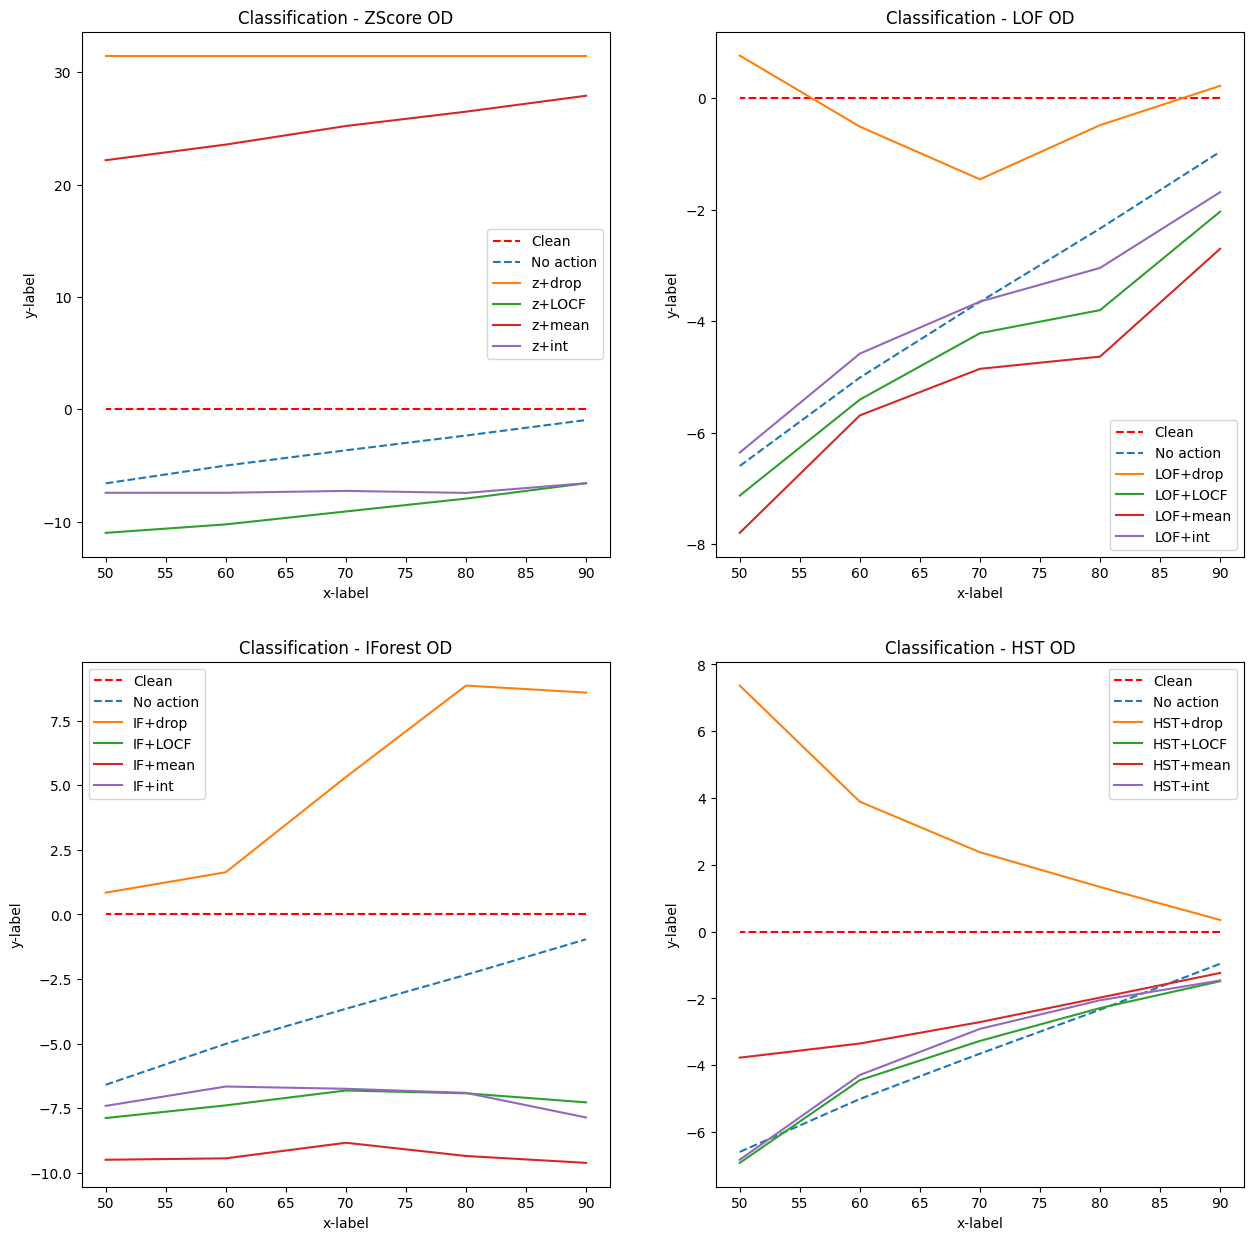

In [46]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))
perc = [90,80,70,60,50]
axs[0,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,0].plot(df_z_drop['percentage'],df_z_drop['mean'], label='z+drop')
axs[0,0].plot(df_z_locf['percentage'],df_z_locf['mean'], label='z+LOCF')
axs[0,0].plot(df_z_mean['percentage'],df_z_mean['mean'], label='z+mean')
axs[0,0].plot(df_z_int['percentage'],df_z_int['mean'], label='z+int')
axs[0,0].set_title("Classification - ZScore OD")
axs[0,0].legend()

axs[0,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[0,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[0,1].plot(df_lof_drop['percentage'],df_lof_drop['mean'], label='LOF+drop')
axs[0,1].plot(df_lof_locf['percentage'],df_lof_locf['mean'], label='LOF+LOCF')
axs[0,1].plot(df_lof_mean['percentage'],df_lof_mean['mean'], label='LOF+mean')
axs[0,1].plot(df_lof_int['percentage'],df_lof_int['mean'], label='LOF+int')
axs[0,1].set_title("Classification - LOF OD")
axs[0,1].legend()

axs[1,0].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,0].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,0].plot(df_if_drop['percentage'],df_if_drop['mean'], label='IF+drop')
axs[1,0].plot(df_if_locf['percentage'],df_if_locf['mean'], label='IF+LOCF')
axs[1,0].plot(df_if_mean['percentage'],df_if_mean['mean'], label='IF+mean')
axs[1,0].plot(df_if_int['percentage'],df_if_int['mean'], label='IF+int')
axs[1,0].set_title("Classification - IForest OD")
axs[1,0].legend()

axs[1,1].plot(perc, [df_none['mean'].iloc[-1]]*len(perc), 'r--', label='Clean')
axs[1,1].plot(df_none['percentage'].iloc[:-1],df_none['mean'].iloc[:-1], '--', label='No action')
axs[1,1].plot(df_hst_drop['percentage'],df_hst_drop['mean'], label='HST+drop')
axs[1,1].plot(df_hst_locf['percentage'],df_hst_locf['mean'], label='HST+LOCF')
axs[1,1].plot(df_hst_mean['percentage'],df_hst_mean['mean'], label='HST+mean')
axs[1,1].plot(df_hst_int['percentage'],df_hst_int['mean'], label='HST+int')
axs[1,1].set_title("Classification - HST OD")
axs[1,1].legend()

for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')
